In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
print(x_train[0].shape)

(32, 32, 3)


In [7]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


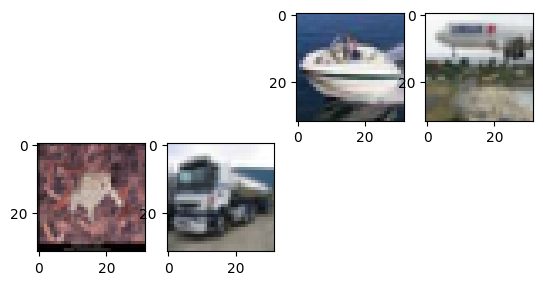

In [8]:
for i in range(222,226):
  plt.subplot(120+1+i)
  img = x_train[i]
  plt.imshow(img)

In [9]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test=x_test/255

n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

#convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training of the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 188s 479ms/step - loss: 1.5618 - accuracy: 0.4247 - val_loss: 1.0941 - val_accuracy: 0.6064
Epoch 2/10
391/391 [==============================] - 174s 444ms/step - loss: 1.0693 - accuracy: 0.6212 - val_loss: 0.9423 - val_accuracy: 0.6708
Epoch 3/10
391/391 [==============================] - 172s 441ms/step - loss: 0.8949 - accuracy: 0.6885 - val_loss: 0.7873 - val_accuracy: 0.7272
Epoch 4/10
391/391 [==============================] - 177s 452ms/step - loss: 0.7886 - accuracy: 0.7261 - val_loss: 0.7950 - val_accuracy: 0.7278
Epoch 5/10
391/391 [==============================] - 183s 467ms/step - loss: 0.7127 - accuracy: 0.7522 - val_loss: 0.6910 - val_accuracy: 0.7599
Epoch 6/10
391/391 [==============================] - 173s 442ms/step - loss: 0.6437 - accuracy: 0.7725 - val_loss: 0.6603 - val_accuracy: 0.7699
Epoch 7/10
391/391 [==============================] - 175s 449ms/step - loss: 0.5952 - accuracy: 0.7911 - val_loss: 0.6473 -

In [11]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 120ms/step


In [12]:
print (predictions)

[[1.29481472e-04 1.35025502e-05 3.68381739e-02 1.50331734e-02
  7.18063295e-01 6.12948649e-02 4.71945124e-04 1.68033674e-01
  4.33827736e-05 7.84009826e-05]
 [1.12107175e-03 1.99599206e-04 2.17035096e-02 3.12509745e-01
  4.38024662e-02 4.74638015e-01 8.65559652e-03 1.34144008e-01
  4.35217429e-04 2.79065059e-03]
 [2.68812000e-04 1.37756952e-05 4.70235944e-02 5.00823092e-03
  8.28955672e-05 2.61455914e-03 9.44161832e-01 1.21693796e-04
  6.95186725e-04 9.44229760e-06]
 [9.64236006e-06 6.44127113e-07 5.60661021e-04 9.32242393e-01
  6.68664929e-03 3.01272795e-03 5.73967583e-02 5.17532208e-05
  1.90513147e-05 1.97695044e-05]
 [1.34552991e-07 9.99839187e-01 1.69982167e-10 1.80074100e-09
  1.52981826e-12 6.63806093e-11 2.40081149e-10 1.03038394e-11
  4.31366698e-06 1.56371243e-04]
 [8.69835130e-05 9.91713285e-01 2.76524389e-07 2.70597388e-06
  4.90578822e-09 3.03663086e-08 3.35320442e-06 3.75503317e-09
  1.18402764e-03 7.00930413e-03]
 [4.05432237e-03 2.76882900e-04 2.22170949e-02 3.80840480e

In [13]:
for image in predictions:
  print(np.sum(image))

0.9999999
0.9999999
1.0
1.0000001
0.99999994
1.0
0.99999994
1.0
1.0


In [14]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 5 6 8]


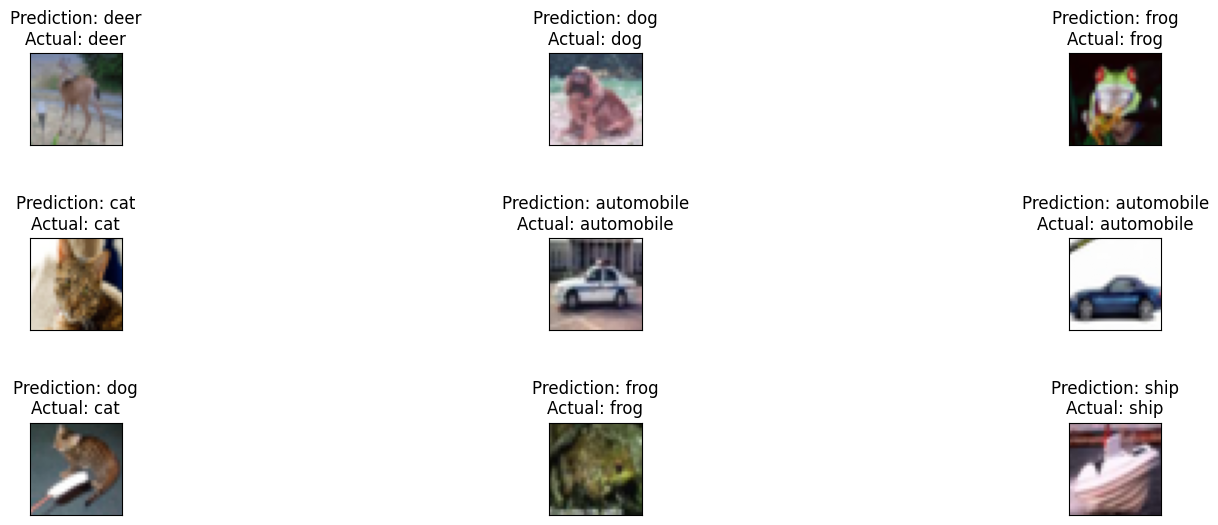

In [15]:
#final_object_detection
fig, axs = plt.subplots(3, 3, figsize= (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show() 